In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

In [3]:
x = np.random.uniform(-np.pi, np.pi, 500)
y = np.random.uniform(-1, 1, 500)

In [4]:
print(x[:5])

[ 1.47824012 -1.29440393  1.37307021 -0.58939449 -1.67931854]


In [5]:
print(y[:5])

[ 0.91896994  0.91446064 -0.92334732 -0.6184436   0.4874424 ]


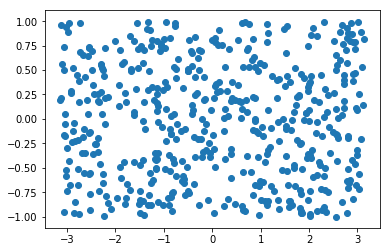

In [6]:
plt.scatter(x,y)
plt.show()

In [7]:
X = np.array([ [x[i], y[i]] for i in range(500)] )

In [8]:
X.shape

(500, 2)

In [10]:
sine = np.sin(x)
sine.shape

(500,)

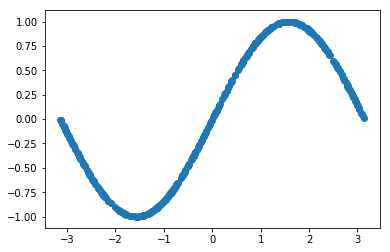

In [11]:
plt.scatter(x, sine)

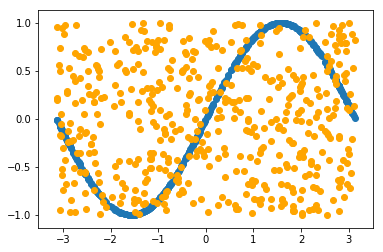

In [23]:
plt.scatter(x, sine)
plt.scatter(X[:,0], X[:, 1], c ='orange')
plt.show()

In [14]:
# sine 곡선 위와 아래의 점들을 분류하는 머신러닝 모델을 만들어보자!

In [24]:
Y = sine < X[:,1] # sine 아래에 있는 놈들은 true, 아닌 놈들은 false

In [26]:
print("     ", Y[:5])

      [False  True False False  True]


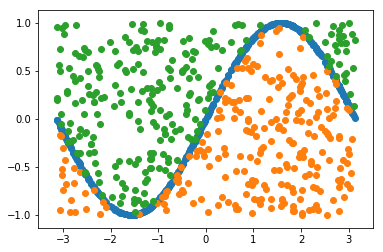

In [29]:
plt.scatter(x, sine)
plt.scatter(X[:,0][Y==0], X[:, 1][Y==0])
plt.scatter(X[:,0][Y==1], X[:, 1][Y==1])

In [30]:
model = Sequential()


In [33]:
model.add( Dense(10, activation = 'relu', input_shape=(2, )))
model.add( Dense(10, activation = 'relu'))
model.add( Dense(10, activation = 'relu'))
model.add( Dense(10, activation = 'relu'))

model.add( Dense(2, activation = 'softmax'))


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
__________

In [35]:
model.compile(loss='categorical_crossentropy', optimizer = 'sgd')

In [42]:
Y = keras.utils.to_categorical(Y) # one hot encoding 적용

In [44]:
model.fit(X, Y, epochs = 200)

ValueError: Error when checking target: expected dense_11 to have 2 dimensions, but got array with shape (500, 2, 2, 2, 2)

In [ ]:
loss_score = model.evaluate(X, Y)
loss_score

In [46]:
a = [-2, 0] # 초록색 점
b = [2, 0] # 주황색 점
pred_x = np.vstack((a, b))
print(pred_x)

[[-2  0]
 [ 2  0]]


In [47]:
pred = model.predict(pred_x)
print(pred)

[[0.5174296  0.48257035]
 [0.50100493 0.4989951 ]]
